In [1]:
cd C:\Users\TIM\Desktop\AI Research Materials\Datasets\Regression

C:\Users\TIM\Desktop\AI Research Materials\Datasets\Regression


In [2]:
ls

 Volume in drive C has no label.
 Volume Serial Number is 284D-2C94

 Directory of C:\Users\TIM\Desktop\AI Research Materials\Datasets\Regression

13/05/2020  00:09    <DIR>          .
13/05/2020  00:09    <DIR>          ..
01/10/2019  20:55            17,209 car data.csv
29/04/2020  02:02           318,263 CCPP.csv
29/04/2020  02:00           241,166 energy_consumption_levels.csv
29/04/2020  02:00         1,723,202 Folds5x2_pp.ods
29/04/2020  02:00         2,029,440 Folds5x2_pp.xlsx
23/01/2020  15:13         1,728,892 hrl_load_metered.csv
27/09/2019  08:59           333,442 Life Expectancy Data.csv
13/05/2020  01:01         3,474,860 Prediction of Output Power in a CCPP (Regression Problem).pdf
14/10/2019  19:08            21,968 Real estate.csv
19/01/2020  21:47               454 Salary_Data.csv
20/09/2019  04:04         1,618,040 Video_Games_Sales.csv
              11 File(s)     11,506,936 bytes
               2 Dir(s)  601,726,234,624 bytes free


In [3]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt
data = pd.read_csv('CCPP.csv')

In [4]:
#AT = Ambient Temp, AP = Ambient Pressure, RH = Relative Humidity, V = Exhaust Vacuum, 
#PE(to be predict): Produced Energy - Electrical Energy output

data.head()

,AT,V,AP,RH,PE
0,8.34,40.77,1010.84,90.01,480.48
1,23.64,58.49,1011.40,74.20,445.75
2,29.74,56.90,1007.15,41.91,438.76
3,19.07,49.69,1007.22,76.79,453.09
4,11.80,40.66,1017.13,97.20,464.43


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9568 entries, 0 to 9567
Data columns (total 5 columns):
AT    9568 non-null float64
V     9568 non-null float64
AP    9568 non-null float64
RH    9568 non-null float64
PE    9568 non-null float64
dtypes: float64(5)
memory usage: 373.9 KB


data.info()

In [6]:
data.describe()

,AT,V,AP,RH,PE
count,9568.000000,9568.000000,9568.000000,9568.000000,9568.000000
mean,19.651231,54.305804,1013.259078,73.308978,454.365009
std,7.452473,12.707893,5.938784,14.600269,17.066995
min,1.810000,25.360000,992.890000,25.560000,420.260000
25%,13.510000,41.740000,1009.100000,63.327500,439.750000
50%,20.345000,52.080000,1012.940000,74.975000,451.550000
75%,25.720000,66.540000,1017.260000,84.830000,468.430000
max,37.110000,81.560000,1033.300000,100.160000,495.760000


In [7]:
df = pd.DataFrame(data)

In [ ]:
import seaborn as sns
plt.figure(figsize = (7, 5))
sns.heatmap(df.corr(), annot = True)

In [11]:
df.corr()

,AT,V,AP,RH,PE
AT,1.000000,0.844107,-0.507549,-0.542535,-0.948128
V,0.844107,1.000000,-0.413502,-0.312187,-0.869780
AP,-0.507549,-0.413502,1.000000,0.099574,0.518429
RH,-0.542535,-0.312187,0.099574,1.000000,0.389794
PE,-0.948128,-0.869780,0.518429,0.389794,1.000000


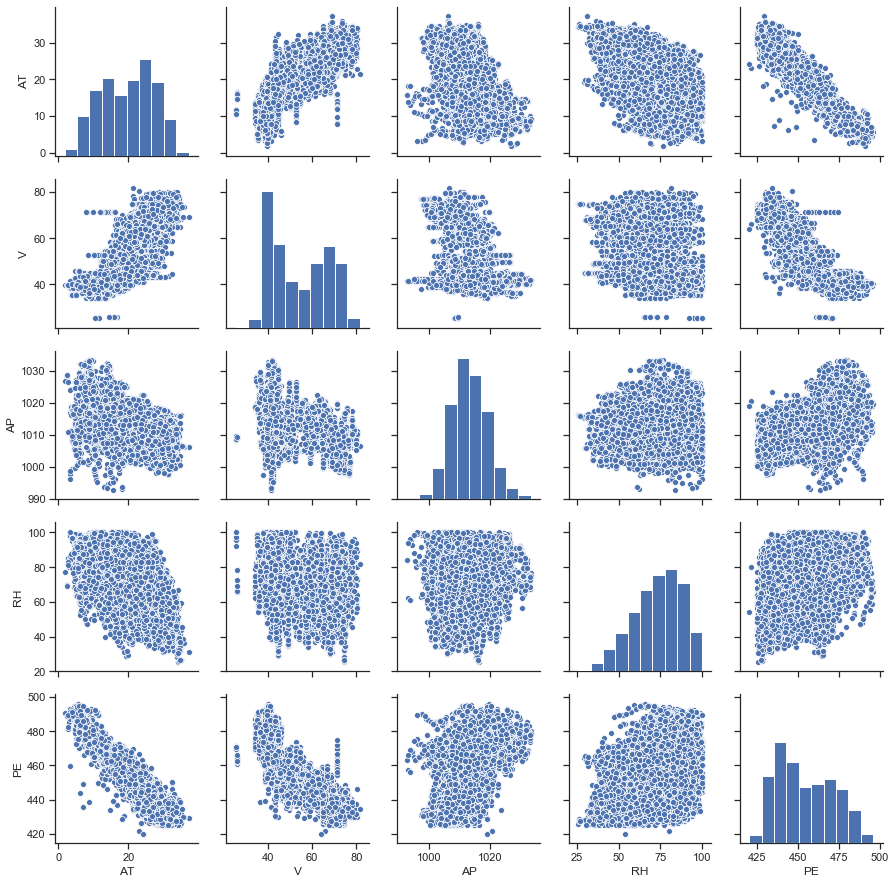

In [12]:
# show the correlation matrix for all the variables. our target variable here is PE
import seaborn as sns
sns.set(style="ticks")

sns.pairplot(df, diag_kind = 'hist') #the diagonal shows the distribution of each variable, the options for diag_kind are: hist, auto, kde, none

In [13]:
df['V'].describe()

count    9568.000000
mean       54.305804
std        12.707893
min        25.360000
25%        41.740000
50%        52.080000
75%        66.540000
max        81.560000
Name: V, dtype: float64

In [14]:
xs = np.array(data['AT'])
zs = np.array(data['PE'])
ys = np.array(data['V'])

In [15]:
zs

array([480.48, 445.75, 438.76, ..., 465.96, 450.93, 451.67])

Text(0.5, 0, 'PE')

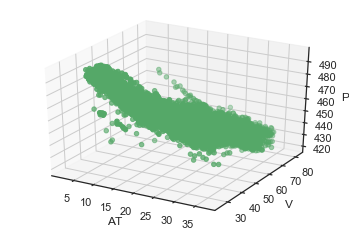

In [16]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(xs, ys, zs, c='g')
ax.set_xlabel('AT')
ax.set_ylabel('V')
ax.set_zlabel('PE')

In [17]:
df.head()

,AT,V,AP,RH,PE
0,8.34,40.77,1010.84,90.01,480.48
1,23.64,58.49,1011.40,74.20,445.75
2,29.74,56.90,1007.15,41.91,438.76
3,19.07,49.69,1007.22,76.79,453.09
4,11.80,40.66,1017.13,97.20,464.43


In [18]:
new_df = df[['AT', 'V', 'PE']]

In [20]:
new_df.head()

,AT,V,PE
0,8.34,40.77,480.48
1,23.64,58.49,445.75
2,29.74,56.90,438.76
3,19.07,49.69,453.09
4,11.80,40.66,464.43


In [21]:
X = new_df[['AT', 'V']]

In [22]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9568 entries, 0 to 9567
Data columns (total 2 columns):
AT    9568 non-null float64
V     9568 non-null float64
dtypes: float64(2)
memory usage: 149.6 KB


In [24]:
y = new_df[['PE']]

In [25]:
y.describe()

,PE
count,9568.000000
mean,454.365009
std,17.066995
min,420.260000
25%,439.750000
50%,451.550000
75%,468.430000
max,495.760000


In [26]:
y

,PE
0,480.48
1,445.75
2,438.76
3,453.09
4,464.43
...,...
9563,462.59
9564,432.90
9565,465.96
9566,450.93


In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [28]:
y_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6697 entries, 4507 to 2732
Data columns (total 1 columns):
PE    6697 non-null float64
dtypes: float64(1)
memory usage: 104.6 KB


In [29]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2871 entries, 4834 to 6409
Data columns (total 2 columns):
AT    2871 non-null float64
V     2871 non-null float64
dtypes: float64(2)
memory usage: 67.3 KB


In [29]:
#implementing a regression algorithm
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [30]:
Predictions = regressor.predict(X_test)

In [32]:
Predictions

array([[436.32247461],
       [449.41840088],
       [442.77684876],
       ...,
       [444.89169065],
       [457.53343434],
       [473.88489222]])

In [31]:
regressor.intercept_

array([505.54821673])

In [32]:
regressor.coef_

array([[-1.70487758, -0.32564873]])

In [33]:
y_test

,PE
4834,426.18
1768,451.10
2819,442.87
7779,443.70
7065,460.59
...,...
9339,440.27
4871,438.42
5128,442.88
7947,456.64


In [36]:
#making predictions on new data
new_AT = float(input("Enter the Ambient Temperature: "))
new_V = float(input("Enter new humidity: "))
eqn = (new_AT * -1.70487758) + (new_V * -0.32564873) + 505.54821673

print ("Output Power in (MW) is ", eqn)

Enter the Ambient Temperature:  16.0
Enter new humidity:  58.44


Output Power in (MW) is  459.2392636688


In [37]:
from sklearn.metrics import mean_squared_error
lin_mse = mean_squared_error(y_test, y_predict)

NameError: name 'y_predict' is not defined

In [ ]:
lin_rmse = np.sqrt(lin_mse)
lin_rmse